In [2]:
import pandas as pd
import os
import glob
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# list all files in dir
files = glob.glob(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Weather Data\small\*')

In [70]:
files

['C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2013.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2014.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2015.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2016.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2017.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2018.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2019.csv',
 'C:\\Users\\Tom\\OneDrive - Cal Poly Pomona\\GBA Fires\\Weather Data\\small\\small2020.csv']

In [71]:
# stack all dataframes to create one
# this only grabs Lat and long column
df = None
for file in files:
    if df is not None:
        df_other = pd.read_csv(file, usecols =['LAT', 'LONG'], low_memory=False)
        df = pd.concat([df, df_other])
    else:
        df = pd.read_csv(file, usecols =['LAT', 'LONG'], low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16398215 entries, 0 to 2032011
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   LAT     float64
 1   LONG    float64
dtypes: float64(2)
memory usage: 375.3 MB


In [72]:
# create data frane with counts of lat and long occurance
df_count = df.groupby(['LAT', 'LONG']).size().reset_index(name='COUNT')

In [7]:
# shapefile for map
ca_counties = gpd.read_file(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Code\Weather\shape\CA_Counties_TIGER2016.shp')

In [8]:
# got this from some tuturial
geometry = [Point(xy) for xy in zip(df_count['LONG'], df_count['LAT'])]

In [9]:
geo_df = gpd.GeoDataFrame(df_count, geometry = geometry)

In [10]:
#shapefile is dif ESPG
ca_counties = ca_counties.to_crs(4326)

In [11]:
print(f'Lat max:  {df_count["LAT"].max()}')
print(f'Lat min:  {df_count["LAT"].min()}')
print(f'Long max:  {df_count["LONG"].max()}')
print(f'Long min:  {df_count["LONG"].min()}')

Lat max:  41.781
Lat min:  32.348
Long max:  -114.618
Long min:  -124.237


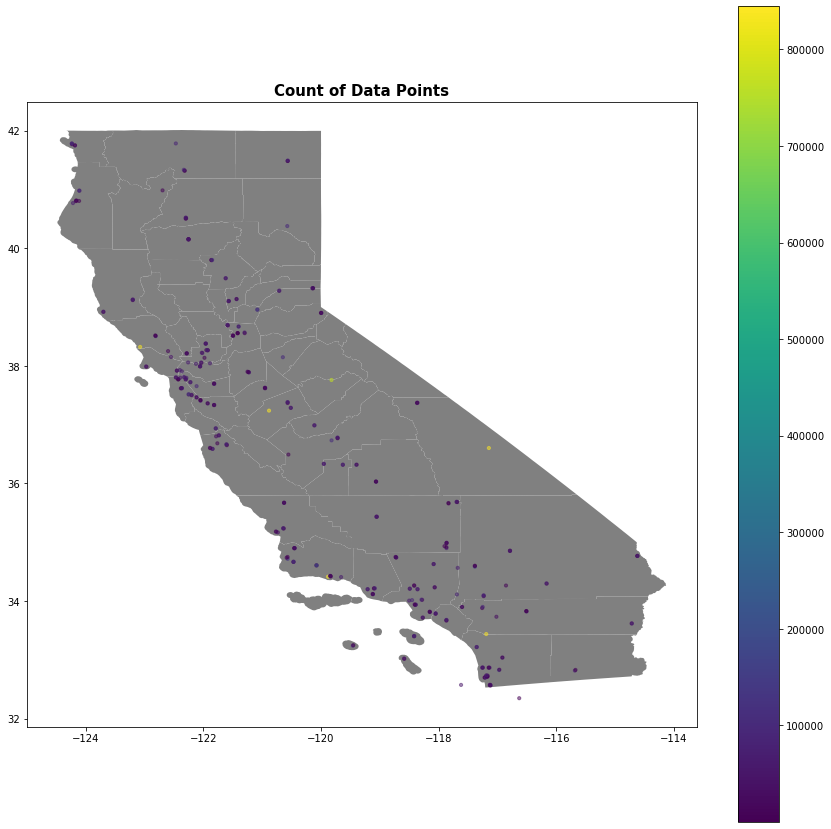

In [12]:
fig, ax = plt.subplots(figsize=(15,15))

ca_counties.plot(ax=ax,color='grey')

geo_df.plot(column='COUNT',ax=ax,alpha=0.5, legend=True,markersize=10)

plt.title('Count of Data Points', fontsize=15,fontweight='bold')

#plt.xlim(-124,-114) #long
#plt.ylim(32,42) #lat

plt.show()

In [6]:
# ensure you have 4gb of memory to spare
# stacks all
df = None
for file in files:
    if df is not None:
        df_other = pd.read_csv(file, low_memory=False)
        df = pd.concat([df, df_other])
    else:
        df = pd.read_csv(file, low_memory=False)
        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16398215 entries, 0 to 2032011
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   TVC                     int64  
 1   USAF                    int64  
 2   WBAN                    int64  
 3   DATE                    object 
 4   TIME                    object 
 5   SOURCE                  object 
 6   LAT                     float64
 7   LONG                    float64
 8   TYPE                    object 
 9   ELEV                    int64  
 10  FWSID                   object 
 11  MPOQC                   object 
 12  WIND_ANGLE              int64  
 13  WIND_QC                 object 
 14  WIND_TYPE               object 
 15  WIND_SPEED              float64
 16  WIND_SPEED_QC           object 
 17  SKY_OBS                 int64  
 18  SKY_OBS_QC              int64  
 19  SKY_OBS_CIEL            object 
 20  SKY_CAVOK               object 
 21  VISIBILITY_DIST         int64 

In [8]:
df.shape

(16398215, 31)

In [9]:
#notice max is 999999 or 99... these should be nan
df.describe()

,TVC,USAF,WBAN,LAT,LONG,ELEV,WIND_ANGLE,WIND_SPEED,SKY_OBS,SKY_OBS_QC,VISIBILITY_DIST,AIR_TEMP,AIR_TEMP_DEW,ATM_PRESSURE,ATM_PRESSURE_QC
count,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07
mean,1.909970e+02,8.413974e+05,6.299700e+04,3.638521e+01,-1.199626e+02,3.649129e+02,6.199575e+02,3.117761e+02,5.371968e+04,6.624620e+00,4.473586e+05,6.805882e+01,4.342038e+02,6.085185e+03,6.809964e+00
std,1.157639e+02,1.352328e+05,3.138366e+04,2.283826e+00,2.131847e+00,1.025600e+03,3.955704e+02,4.611725e+02,4.268592e+04,2.338656e+00,4.890246e+05,2.205256e+02,4.917078e+02,4.454868e+03,2.747633e+00
min,0.000000e+00,6.901500e+05,2.311000e+04,3.234800e+01,-1.242370e+02,-1.300000e+01,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.900000e+01,-6.400000e+01,9.330000e+02,1.000000e+00
25%,1.330000e+02,7.238960e+05,2.327700e+04,3.440800e+01,-1.218160e+02,1.600000e+01,2.400000e+02,1.500000e+00,2.200000e+04,5.000000e+00,1.609300e+04,1.110000e+01,7.200000e+00,1.016100e+03,5.000000e+00
50%,1.690000e+02,7.259450e+05,5.315200e+04,3.666400e+01,-1.199500e+02,3.400000e+01,9.990000e+02,3.600000e+00,2.200000e+04,5.000000e+00,1.609300e+04,1.540000e+01,1.390000e+01,9.999900e+03,9.000000e+00
75%,2.150000e+02,9.999990e+05,9.324300e+04,3.803300e+01,-1.178660e+02,3.470000e+02,9.990000e+02,9.999000e+02,9.999900e+04,9.000000e+00,9.999990e+05,2.160000e+01,9.999000e+02,9.999900e+03,9.000000e+00
max,1.457000e+03,9.999990e+05,9.999900e+04,4.178100e+01,-1.146180e+02,9.999000e+03,9.990000e+02,9.999000e+02,9.999900e+04,9.000000e+00,9.999990e+05,9.999000e+02,9.999000e+02,9.999900e+03,9.000000e+00


In [11]:
# replce missing value according to isd with nan
df.ELEV.replace(9999, np.nan, inplace = True)
df.WIND_ANGLE.replace(999, np.nan, inplace = True)
df.WIND_SPEED.replace(999.9, np.nan, inplace = True)
df.SKY_OBS.replace(99999, np.nan, inplace = True)
df.VISIBILITY_DIST.replace(999999, np.nan, inplace = True)
df.AIR_TEMP.replace(999.9, np.nan, inplace = True)
df.AIR_TEMP_DEW.replace(999.9, np.nan, inplace = True)
df.ATM_PRESSURE.replace(9999.9, np.nan, inplace = True)

In [12]:
df.describe()

,TVC,USAF,WBAN,LAT,LONG,ELEV,WIND_ANGLE,WIND_SPEED,SKY_OBS,SKY_OBS_QC,VISIBILITY_DIST,AIR_TEMP,AIR_TEMP_DEW,ATM_PRESSURE,ATM_PRESSURE_QC
count,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.639822e+07,1.626240e+07,7.960700e+06,1.131580e+07,8.976856e+06,1.639822e+07,9.197585e+06,1.552962e+07,9.341382e+06,7.145198e+06,1.639822e+07
mean,1.909970e+02,8.413974e+05,6.299700e+04,3.638521e+01,-1.199626e+02,2.844547e+02,2.182119e+02,2.709674e+00,1.545957e+04,6.624620e+00,1.470607e+04,1.593986e+01,6.855594e+00,1.015637e+03,6.809964e+00
std,1.157639e+02,1.352328e+05,3.138366e+04,2.283826e+00,2.131847e+00,5.282285e+02,9.298370e+01,2.425190e+00,9.693255e+03,2.338656e+00,8.834426e+03,8.280086e+00,6.925748e+00,5.120668e+00,2.747633e+00
min,0.000000e+00,6.901500e+05,2.311000e+04,3.234800e+01,-1.242370e+02,-1.300000e+01,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.900000e+01,-6.400000e+01,9.330000e+02,1.000000e+00
25%,1.330000e+02,7.238960e+05,2.327700e+04,3.440800e+01,-1.218160e+02,1.600000e+01,1.500000e+02,1.000000e+00,1.676000e+03,5.000000e+00,1.448400e+04,1.100000e+01,3.000000e+00,1.012200e+03,5.000000e+00
50%,1.690000e+02,7.259450e+05,5.315200e+04,3.666400e+01,-1.199500e+02,3.000000e+01,2.400000e+02,2.100000e+00,2.200000e+04,5.000000e+00,1.609300e+04,1.500000e+01,8.300000e+00,1.015200e+03,9.000000e+00
75%,2.150000e+02,9.999990e+05,9.324300e+04,3.803300e+01,-1.178660e+02,3.470000e+02,2.900000e+02,4.100000e+00,2.200000e+04,9.000000e+00,1.609300e+04,2.000000e+01,1.200000e+01,1.018800e+03,9.000000e+00
max,1.457000e+03,9.999990e+05,9.999900e+04,4.178100e+01,-1.146180e+02,2.057000e+03,3.600000e+02,7.820000e+01,2.200000e+04,9.000000e+00,1.600000e+05,5.900000e+01,3.630000e+01,1.080100e+03,9.000000e+00


In [ ]:
# general exploration

In [13]:
len(df['USAF'].unique())

140

In [14]:
len(df['WBAN'].unique())

105

In [15]:
df['USAF'].value_counts()

999999    5068838
720267     207626
723762     205211
724836     198046
722907     151011
           ...   
720165       8549
720935       8536
721027       8436
724916       4107
723826       1645
Name: USAF, Length: 140, dtype: int64

In [16]:
df['WBAN'].value_counts()

99999    2511196
53151     844554
53139     844542
53152     844494
93243     844350
          ...   
53130      31861
24213      21883
23272       5743
23271       5456
93194       1645
Name: WBAN, Length: 105, dtype: int64

In [17]:
# combine USAF and WBAN to create Station
df["STATION"] = df["USAF"].astype(str) + '-' + df["WBAN"].astype(str)

In [18]:
#combine lat long
df["LAT_LONG"] = df["LAT"].astype(str) + ',' + df["LONG"].astype(str)

In [19]:
# count occurance of lat long
df_count_LAT_LONG = df.groupby(['LAT_LONG']).size().reset_index(name='COUNT')

In [20]:
# count occurance of station
df_count_STATION = df.groupby(['STATION']).size().reset_index(name='COUNT')

In [21]:
df_count_LAT_LONG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LAT_LONG  334 non-null    object
 1   COUNT     334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


In [23]:
#seems like there are more unique lat long combinations than there are stations, they should be the same
df_count_STATION.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATION  148 non-null    object
 1   COUNT    148 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [73]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LAT     334 non-null    float64
 1   LONG    334 non-null    float64
 2   COUNT   334 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.0 KB


In [24]:
df.isna().sum()

TVC                             0
USAF                            0
WBAN                            0
DATE                            0
TIME                            0
SOURCE                          0
LAT                             0
LONG                            0
TYPE                            0
ELEV                       135814
FWSID                           0
MPOQC                           0
WIND_ANGLE                8437515
WIND_QC                         0
WIND_TYPE                       0
WIND_SPEED                5082418
WIND_SPEED_QC                   0
SKY_OBS                   7421359
SKY_OBS_QC                      0
SKY_OBS_CIEL                    0
SKY_CAVOK                       0
VISIBILITY_DIST           7200630
VISIBILITY_QC                   0
VISIBILITY_VAR                  0
VISIBILITY_QUALITY_VAR          0
AIR_TEMP                   868590
AIR_TEMP_QC                     0
AIR_TEMP_DEW              7056833
AIR_TEMP_DEW_QC                 0
ATM_PRESSURE  

In [25]:
#need to look into why these have different locations

In [26]:
# count of unique Lat for each station
print(df.groupby('STATION')['LAT'].nunique().sort_values(ascending = False).reset_index().to_string())

          STATION  LAT
0    725940-24213    4
1    998013-99999    4
2    723830-23187    4
3    722970-23129    3
4    723895-23149    3
5    722977-93184    3
6    723171-53144    3
7    725930-23233    3
8    725920-24257    3
9    723810-23114    3
10   725910-24216    3
11   723825-23131    3
12   723890-93193    3
13   724957-23213    3
14   725957-24215    3
15   724950-23254    3
16   724940-23234    3
17   723930-93214    3
18   723965-93209    3
19   724800-23157    3
20   724810-23203    3
21   724926-23258    3
22   724830-23232    3
23   724920-23237    3
24   722950-23174    3
25   724839-93225    3
26   722868-93138    3
27   998011-99999    3
28   746120-93104    3
29   745160-23202    3
30   745090-23244    3
31   997997-99999    3
32   724927-23285    2
33   999999-23271    2
34   999999-23272    2
35   724915-23259    2
36   725845-23225    2
37   997734-99999    2
38   997292-99999    2
39   724937-23289    2
40   994044-99999    2
41   994041-99999    2
42   724945

In [27]:
# count of unique Long for each station
print(df.groupby('STATION')['LONG'].nunique().sort_values(ascending = False).reset_index().to_string())

          STATION  LONG
0    724940-23234     4
1    723925-23190     4
2    723940-23273     4
3    725910-24216     4
4    725920-24257     4
5    725846-93201     4
6    745160-23202     4
7    722950-23174     4
8    724920-23237     4
9    725940-24213     3
10   723830-23187     3
11   725946-24286     3
12   723890-93193     3
13   723895-23149     3
14   725930-23233     3
15   723815-23161     3
16   723810-23114     3
17   723910-93111     3
18   723840-23155     3
19   723930-93214     3
20   723926-23136     3
21   723171-53144     3
22   725847-93230     3
23   724800-23157     3
24   724810-23203     3
25   724828-93241     3
26   724973-93203     3
27   724957-23213     3
28   724955-93227     3
29   724838-93205     3
30   724839-93225     3
31   724946-93232     3
32   724926-23258     3
33   724927-23285     3
34   723805-23179     3
35   724830-23232     3
36   746120-93104     3
37   722906-93112     3
38   997997-99999     3
39   998011-99999     3
40   998013-9999

In [ ]:
# general exploration to resolve more than one Lat Long for each Station

In [28]:
df[df['STATION'] == '725940-24213']['LAT'].unique()

array([40.8  , 40.81 , 40.809, 40.803])

In [29]:
df[df['STATION'] == '725940-24213']['LONG'].unique()

array([-124.167, -124.16 , -124.113])

In [30]:
df[df['STATION'] == '722970-23129']['LAT'].unique()

array([33.817, 33.812, 33.818])

In [31]:
df[df['STATION'] == '722970-23129']['LONG'].unique()

array([-118.15 , -118.146, -118.152])

In [32]:
df[df['STATION'] == '724815-23257']['LAT'].unique()

array([37.285])

In [33]:
items = df[df['STATION'] == '725940-24213']['LAT'].unique().tolist()

In [34]:
items

[40.8, 40.81, 40.809, 40.803]

In [35]:
# https://stackoverflow.com/questions/53041365/python-maximum-difference-between-elements-in-a-list
# checks to see that greatest difference between all elements
def maxDiff(a):
    vmin = a[0]
    dmax = 0
    for i in range(len(a)):
        if (a[i] < vmin):
            vmin = a[i]
        elif (a[i] - vmin > dmax):
            dmax = a[i] - vmin
    return dmax

In [36]:
maxDiff(items) > 1

False

In [37]:
# gets most freqeuntly occuring value
df[df['STATION'] == '725940-24213']['LAT'].value_counts().index[0]

40.81

In [39]:
# for stations that do not have the same lat long throughout, set them to the highest occuring value
df['LAT'] = np.where((df['STATION']== '725940-24213') & (df['LAT'] != 40.81), 40.81, df['LAT'])

In [40]:
df

,TVC,USAF,WBAN,DATE,TIME,SOURCE,LAT,LONG,TYPE,ELEV,...,VISIBILITY_VAR,VISIBILITY_QUALITY_VAR,AIR_TEMP,AIR_TEMP_QC,AIR_TEMP_DEW,AIR_TEMP_DEW_QC,ATM_PRESSURE,ATM_PRESSURE_QC,STATION,LAT_LONG
0,149,690150,93121,2013-01-01,00:56:00,6,34.300,-116.166,FM-15,696.0,...,N,5,7.2,5,-11.7,5,1023.1,5,690150-93121,"34.3,-116.166"
1,149,690150,93121,2013-01-01,01:56:00,6,34.300,-116.166,FM-15,696.0,...,N,5,3.9,5,-12.2,5,1023.9,5,690150-93121,"34.3,-116.166"
2,169,690150,93121,2013-01-01,02:56:00,6,34.300,-116.166,FM-15,696.0,...,N,5,4.4,5,-12.2,5,1024.0,5,690150-93121,"34.3,-116.166"
3,156,690150,93121,2013-01-01,03:56:00,6,34.300,-116.166,FM-15,696.0,...,N,5,1.7,5,-12.8,5,1024.4,5,690150-93121,"34.3,-116.166"
4,156,690150,93121,2013-01-01,04:56:00,6,34.300,-116.166,FM-15,696.0,...,N,5,1.7,5,-13.3,5,1024.5,5,690150-93121,"34.3,-116.166"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032007,133,999999,93245,2020-12-31,23:35:00,I,38.321,-123.075,CRN05,19.0,...,9,9,11.7,1,NaN,9,NaN,9,999999-93245,"38.321,-123.075"
2032008,133,999999,93245,2020-12-31,23:40:00,I,38.321,-123.075,CRN05,19.0,...,9,9,11.6,1,NaN,9,NaN,9,999999-93245,"38.321,-123.075"
2032009,133,999999,93245,2020-12-31,23:45:00,I,38.321,-123.075,CRN05,19.0,...,9,9,11.5,1,NaN,9,NaN,9,999999-93245,"38.321,-123.075"
2032010,133,999999,93245,2020-12-31,23:50:00,I,38.321,-123.075,CRN05,19.0,...,9,9,11.5,1,NaN,9,NaN,9,999999-93245,"38.321,-123.075"


In [41]:
# check if the above works
df[df['STATION'] == '725940-24213']['LAT'].value_counts()

40.81    21883
Name: LAT, dtype: int64

In [42]:
df[df['STATION'] == '725940-24213']['LAT'].unique()

array([40.81])

In [43]:
# list of stations that need to be adjusted
df_lat_adjust = df.groupby('STATION')['LAT'].nunique().sort_values(ascending = False).reset_index()
lat_list = df_lat_adjust[df_lat_adjust['LAT'] > 1]['STATION'].to_list()

In [44]:
# iterates over all stataions with multiple lat/ long and sets Lat/ long to the most frequently occuring values if
# the max difference between all lat/ long value is less than 1
for station in lat_list:
    items = df[df['STATION'] == station]['LAT'].unique().tolist()
    if maxDiff(items) > 1:
        print(f'Station: {station} needs further evaluation')
    else:
        new_value = df[df['STATION'] == station]['LAT'].value_counts().index[0]
        df['LAT'] = np.where((df['STATION']== station) & (df['LAT'] != new_value), new_value, df['LAT'])

In [45]:
# same as above but for long
df_long_adjust = df.groupby('STATION')['LONG'].nunique().sort_values(ascending = False).reset_index()
long_list = df_long_adjust[df_long_adjust['LONG'] > 1]['STATION'].to_list()

In [46]:
# same as above but for long
for station in long_list:
    items = df[df['STATION'] == station]['LONG'].unique().tolist()
    if maxDiff(items) > 1:
        print(f'Station: {station} needs further evaluation')
    else:
        new_value = df[df['STATION'] == station]['LONG'].value_counts().index[0]
        df['LONG'] = np.where((df['STATION']== station) & (df['LONG'] != new_value), new_value, df['LONG'])

Station: 997997-99999 needs further evaluation


In [ ]:
# need to review 997997-99999

In [47]:
df.groupby('STATION')['LAT'].nunique().sort_values(ascending = False).reset_index()

,STATION,LAT
0,690150-93121,1
1,725946-24286,1
2,725957-24215,1
3,725958-94299,1
4,745046-93242,1
...,...,...
143,723898-53119,1
144,723910-93111,1
145,723925-23190,1
146,723926-23136,1


In [48]:
df.groupby('STATION')['LONG'].nunique().sort_values(ascending = False).reset_index()

,STATION,LONG
0,997997-99999,3
1,690150-93121,1
2,725946-24286,1
3,725957-24215,1
4,725958-94299,1
...,...,...
143,723898-53119,1
144,723910-93111,1
145,723925-23190,1
146,723926-23136,1


In [49]:
# kinda far off tbh
df[df['STATION'] == '997997-99999']['LONG'].unique().tolist()

[-121.733, -121.739, -120.554]

In [50]:
df[df['STATION'] == '997997-99999']['LONG'].value_counts()

-121.733    57874
-121.739    38657
-120.554       59
Name: LONG, dtype: int64

In [ ]:
# just gonna set this one to the most occuring

In [51]:
df['LONG'] = np.where((df['STATION']== '997997-99999') & (df['LONG'] != -121.733), -121.733, df['LONG'])

In [53]:
df.groupby('STATION')['LAT'].nunique().sort_values(ascending = False).reset_index()

,STATION,LAT
0,690150-93121,1
1,725946-24286,1
2,725957-24215,1
3,725958-94299,1
4,745046-93242,1
...,...,...
143,723898-53119,1
144,723910-93111,1
145,723925-23190,1
146,723926-23136,1


In [52]:
df.groupby('STATION')['LONG'].nunique().sort_values(ascending = False).reset_index()

,STATION,LONG
0,690150-93121,1
1,725946-24286,1
2,725957-24215,1
3,725958-94299,1
4,745046-93242,1
...,...,...
143,723898-53119,1
144,723910-93111,1
145,723925-23190,1
146,723926-23136,1


In [ ]:
# replot map with new data

In [57]:
df_count = df.groupby(['LAT', 'LONG']).size().reset_index(name='COUNT')

In [58]:
ca_counties = gpd.read_file(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Code\Weather\shape\CA_Counties_TIGER2016.shp')

In [59]:
geometry = [Point(xy) for xy in zip(df_count['LONG'], df_count['LAT'])]

In [60]:
geo_df = gpd.GeoDataFrame(df_count, geometry = geometry)

In [61]:
ca_counties = ca_counties.to_crs(4326)

In [ ]:
#not much of a difference

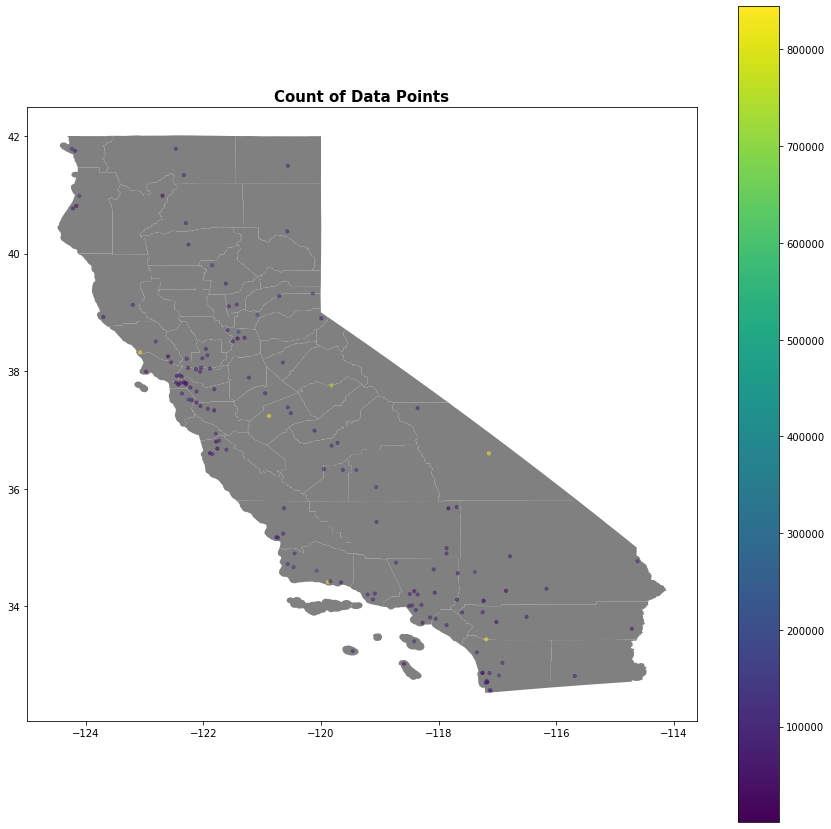

In [62]:
fig, ax = plt.subplots(figsize=(15,15))

ca_counties.plot(ax=ax,color='grey')

geo_df.plot(column='COUNT',ax=ax,alpha=0.5, legend=True,markersize=10)

plt.title('Count of Data Points', fontsize=15,fontweight='bold')

#plt.xlim(-124,-114) #long
#plt.ylim(32,42) #lat

plt.show()

In [64]:
df.isna().sum()

TVC                             0
USAF                            0
WBAN                            0
DATE                            0
TIME                            0
SOURCE                          0
LAT                             0
LONG                            0
TYPE                            0
ELEV                       135814
FWSID                           0
MPOQC                           0
WIND_ANGLE                8437515
WIND_QC                         0
WIND_TYPE                       0
WIND_SPEED                5082418
WIND_SPEED_QC                   0
SKY_OBS                   7421359
SKY_OBS_QC                      0
SKY_OBS_CIEL                    0
SKY_CAVOK                       0
VISIBILITY_DIST           7200630
VISIBILITY_QC                   0
VISIBILITY_VAR                  0
VISIBILITY_QUALITY_VAR          0
AIR_TEMP                   868590
AIR_TEMP_QC                     0
AIR_TEMP_DEW              7056833
AIR_TEMP_DEW_QC                 0
ATM_PRESSURE  

In [66]:
# remove rows with blank air temp
df.dropna(subset=['AIR_TEMP'], inplace = True)

In [67]:
df.isna().sum()

TVC                             0
USAF                            0
WBAN                            0
DATE                            0
TIME                            0
SOURCE                          0
LAT                             0
LONG                            0
TYPE                            0
ELEV                         1902
FWSID                           0
MPOQC                           0
WIND_ANGLE                7784948
WIND_QC                         0
WIND_TYPE                       0
WIND_SPEED                4633547
WIND_SPEED_QC                   0
SKY_OBS                   6651804
SKY_OBS_QC                      0
SKY_OBS_CIEL                    0
SKY_CAVOK                       0
VISIBILITY_DIST           6430134
VISIBILITY_QC                   0
VISIBILITY_VAR                  0
VISIBILITY_QUALITY_VAR          0
AIR_TEMP                        0
AIR_TEMP_QC                     0
AIR_TEMP_DEW              6202409
AIR_TEMP_DEW_QC                 0
ATM_PRESSURE  

In [68]:
# column not needed
del df['TVC']

In [69]:
df.to_csv(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Weather Data\weather.csv', index = False )

In [ ]:
#create much smaller sample file

In [7]:
import pandas as pd
import random

In [2]:
df = pd.read_csv(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Weather Data\weather.csv', low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15529625 entries, 0 to 15529624
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   USAF                    int64  
 1   WBAN                    int64  
 2   DATE                    object 
 3   TIME                    object 
 4   SOURCE                  object 
 5   LAT                     float64
 6   LONG                    float64
 7   TYPE                    object 
 8   ELEV                    float64
 9   FWSID                   object 
 10  MPOQC                   object 
 11  WIND_ANGLE              float64
 12  WIND_QC                 object 
 13  WIND_TYPE               object 
 14  WIND_SPEED              float64
 15  WIND_SPEED_QC           object 
 16  SKY_OBS                 float64
 17  SKY_OBS_QC              int64  
 18  SKY_OBS_CIEL            object 
 19  SKY_CAVOK               object 
 20  VISIBILITY_DIST         float64
 21  VISIBILITY_QC           objec

In [4]:
stations = df['STATION'].unique().tolist()

In [5]:
len(stations)

142

In [8]:
new_stations = random.choices(stations, k=10)

In [9]:
new_stations

['723965-93209',
 '745160-23202',
 '994041-99999',
 '724815-23257',
 '724800-23157',
 '724926-23258',
 '720935-99999',
 '999999-53152',
 '723896-93144',
 '994034-99999']

In [11]:
df_sample = df[df['STATION'].isin(new_stations)]

In [12]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1515693 entries, 78845 to 15324377
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   USAF                    1515693 non-null  int64  
 1   WBAN                    1515693 non-null  int64  
 2   DATE                    1515693 non-null  object 
 3   TIME                    1515693 non-null  object 
 4   SOURCE                  1515693 non-null  object 
 5   LAT                     1515693 non-null  float64
 6   LONG                    1515693 non-null  float64
 7   TYPE                    1515693 non-null  object 
 8   ELEV                    1515693 non-null  float64
 9   FWSID                   1515693 non-null  object 
 10  MPOQC                   1515693 non-null  object 
 11  WIND_ANGLE              530731 non-null   float64
 12  WIND_QC                 1515693 non-null  object 
 13  WIND_TYPE               1515693 non-null  object 
 1

In [17]:
df_sample['STATION'].unique().tolist()

['720935-99999',
 '723896-93144',
 '723965-93209',
 '724800-23157',
 '724815-23257',
 '724926-23258',
 '745160-23202',
 '994034-99999',
 '994041-99999',
 '999999-53152']

In [18]:
df_sample.to_csv(r'C:\Users\Tom\OneDrive - Cal Poly Pomona\GBA Fires\Weather Data\weather_sample.csv', index = False )